In [147]:
import array

In [148]:
from quspin.operators import hamiltonian # Hamiltonians and operators
from quspin.basis import spinless_fermion_basis_1d # Hilbert space fermion basis
from quspin.basis import boson_basis_1d # Hilbert space boson basis
from quspin.tools.block_tools import block_diag_hamiltonian # block diagonalisation
import numpy as np # generic math functions
import matplotlib.pyplot as plt

# a)

### Bosonic case

In [238]:
##### define model parameters #####
L=8 # system size
J=1.0 # hopping
U=10.0 # interaction
Nbosons=4
deltaJ = 0.5

In [239]:
basis = boson_basis_1d(L,Nb=Nbosons,sps=2)
#print(basis)

In [240]:
# PBC case
hop_pbc=[[-J-deltaJ*(-1)**i,i,(i+1)%L] for i in range(L)]
# OBC case
hop_obc=[[-J-deltaJ*(-1)**i,i,(i+1)] for i in range(L-1)]

interact_nn=[[0.5*U,i,i] for i in range(L)]
interact_n=[[-0.5*U,i] for i in range(L)]

In [241]:
# PBC
static_pbc=[['+-',hop_pbc],['-+',hop_pbc],['nn',interact_nn],['n',interact_n]]
# OBC
static_obc=[['+-',hop_obc],['-+',hop_obc],['nn',interact_nn],['n',interact_n]]

dynamic=[]

In [242]:
# PBC
H_pbc=hamiltonian(static_pbc,dynamic,basis=basis,dtype=np.float64) #symm true
# PBC
H_obc=hamiltonian(static_obc,dynamic,basis=basis,dtype=np.float64,check_symm=False) #symm false

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!


In [243]:
# PBC
E_pbc,V_pbc=H_pbc.eigh()
# OBC
E_obc,V_obc=H_obc.eigh()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


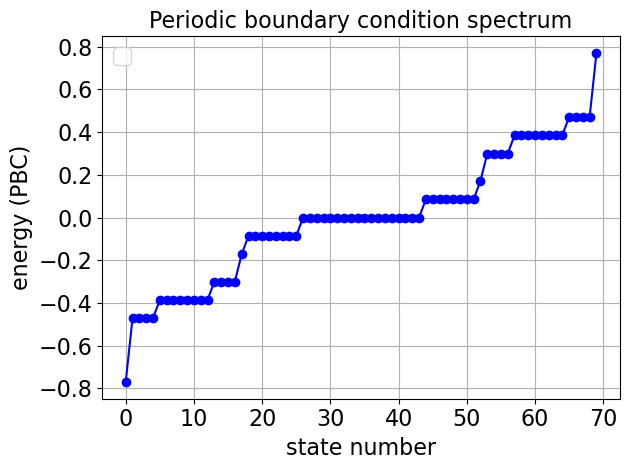

In [244]:
# PBC

%matplotlib inline
plt.plot(np.arange(H_pbc.Ns),E_pbc/L,marker='o',color='b')
#plt.plot(np.arange(Hblock.Ns),Eblock/L,marker='x',color='r',markersize=2,label='momentum space')
plt.xlabel('state number',fontsize=16)
plt.ylabel('energy (PBC)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.title("Periodic boundary condition spectrum",fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


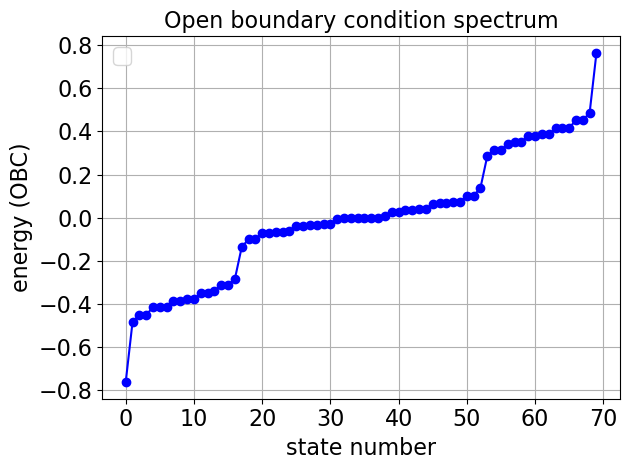

In [245]:
# OBC

%matplotlib inline
plt.plot(np.arange(H_obc.Ns),E_obc/L,marker='o',color='b')
#plt.plot(np.arange(Hblock.Ns),Eblock/L,marker='x',color='r',markersize=2,label='momentum space')
plt.xlabel('state number',fontsize=16)
plt.ylabel('energy (OBC)',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.title("Open boundary condition spectrum",fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

# b)

## 1b) 2b) OBCS with even/odd sites

### Bosonic case

In [169]:
length = 100
deltaJ = np.linspace(-0.8, 0.8, num=length, endpoint=True)
L_e = 8
L_o = 9
J = 1.0
U = 10
Nbosons = 4

#### 1b) Even sites

In [170]:
basis_e = boson_basis_1d(L_e,Nb=Nbosons,sps=2)

hop_obc_e=[[[-J-dj*(-1)**i,i,(i+1)] for i in range(L_e-1)] for dj in deltaJ]
interact_nn_e=[[0.5*U,i,i] for i in range(L_e)]
interact_n_e=[[-0.5*U,i] for i in range(L_e)]

static_obc_e=[[['+-',hop_obc_e[j]],['-+',hop_obc_e[j]],['nn',interact_nn_e],['n',interact_n_e]] for j in range(length)] 
dynamic=[]

H_obc_e=[hamiltonian(static_obc_e[j],dynamic,basis=basis,dtype=np.float64,check_symm=False) for j in range(length)] #symm false

E_obc_e = np.zeros(length) 
for j in range(length):
    E_obc_e[j], V = H_obc_e[j].eigsh(k=1,which='SA',maxiter=1E9)


Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

#### 2b) Odd sites

In [172]:
basis_o = boson_basis_1d(L_o,Nb=Nbosons,sps=2)

hop_obc_o=[[[-J-dj*(-1)**i,i,(i+1)] for i in range(L_o-1)] for dj in deltaJ]
interact_nn_o=[[0.5*U,i,i] for i in range(L_o)]
interact_n_o=[[-0.5*U,i] for i in range(L_o)]

static_obc_o=[[['+-',hop_obc_o[j]],['-+',hop_obc_o[j]],['nn',interact_nn_o],['n',interact_n_o]] for j in range(length)] 
dynamic=[]

H_obc_o=[hamiltonian(static_obc_o[j],dynamic,basis=basis_o,dtype=np.float64,check_symm=False) for j in range(length)] #symm false

E_obc_o = np.zeros(length) 
for j in range(length):
    E_obc_o[j], V = H_obc_o[j].eigsh(k=1,which='SA',maxiter=1E9)


Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermiticity check passed!
Particle conservation check passed!
Hermitic

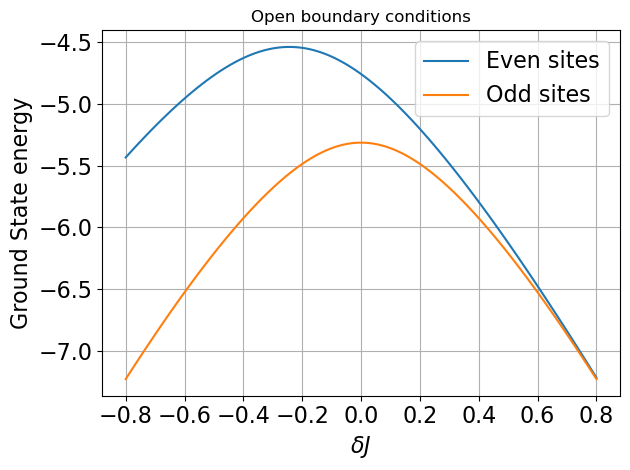

In [ ]:
plt.plot(deltaJ,E_obc_e, label='Even sites')
plt.plot(deltaJ,E_obc_o, label='Odd sites')
plt.title('Open boundary conditions')
plt.xlabel('$\delta J$',fontsize=16)
plt.ylabel('Ground State energy',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

## 3b) 4b) PBCS with even/odd sites

### Bosonic case

In [ ]:
length = 100
deltaJ = np.linspace(-0.8, 0.8, num=length, endpoint=True)
L_e = 8
L_o = 9
J = 1.0
U = 10
Nbosons = 4

#### 3b) Even sites

In [ ]:
basis_e = boson_basis_1d(L_e,Nb=Nbosons,sps=2)

hop_pbc_e=[[[-J-dj*(-1)**i,i,(i+1)%L_e] for i in range(L_e)] for dj in deltaJ] 
interact_nn_e=[[0.5*U,i,i] for i in range(L_e)]
interact_n_e=[[-0.5*U,i] for i in range(L_e)]

static_pbc_e=[[['+-',hop_pbc_e[j]],['-+',hop_pbc_e[j]],['nn',interact_nn_e],['n',interact_n_e]] for j in range(length)]
dynamic=[]

H_pbc_e=[hamiltonian(static_pbc_e[j],dynamic,basis=basis_e,dtype=np.float64) for j in range(length)] #symm true

E_pbc_e = np.zeros(length) 
for j in range(length):
    E_pbc_e[j], V = H_pbc_e[j].eigsh(k=1,which='SA',maxiter=1E9)

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Part

#### 4b) Odd sites

In [ ]:
basis_o = boson_basis_1d(L_o,Nb=Nbosons,sps=2)

hop_pbc_o=[[[-J-dj*(-1)**i,i,(i+1)%L_o] for i in range(L_o)] for dj in deltaJ] 
interact_nn_o=[[0.5*U,i,i] for i in range(L_o)]
interact_n_o=[[-0.5*U,i] for i in range(L_o)]

static_pbc_o=[[['+-',hop_pbc_o[j]],['-+',hop_pbc_o[j]],['nn',interact_nn_o],['n',interact_n_o]] for j in range(length)]
dynamic=[]

H_pbc_o=[hamiltonian(static_pbc_o[j],dynamic,basis=basis_o,dtype=np.float64) for j in range(length)] #symm true

E_pbc_o = np.zeros(length) 
for j in range(length):
    E_pbc_o[j], V = H_pbc_o[j].eigsh(k=1,which='SA',maxiter=1E9)

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Part

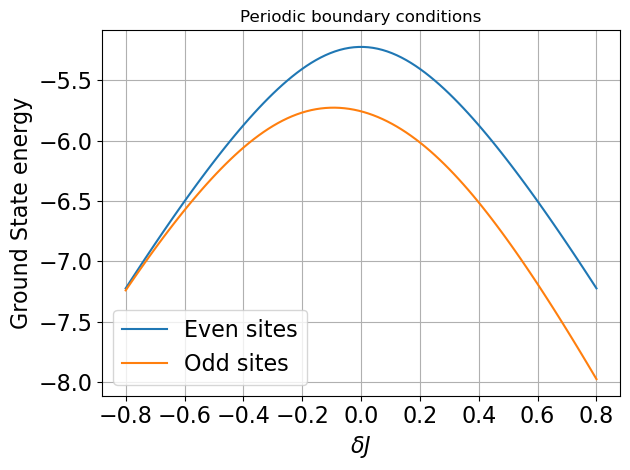

In [ ]:
plt.plot(deltaJ,E_pbc_e, label='Even sites')
plt.plot(deltaJ,E_pbc_o, label='Odd sites')
plt.title('Periodic boundary conditions')
plt.xlabel('$\delta J$',fontsize=16)
plt.ylabel('Ground State energy',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

# c)

The SSH bosonic Hamiltonian does not posses formal particle-hole symmetry in general. By exchanging creation and annihilation operators in the original form of the Hamiltonian, we notice that thanks to the Hermitian conjugate part of the hopping term, the latter will not be affected, on the countrary of the interaction term containing the number operator $n$. The fact that the interaction term breaks symmetry for bosons can be understood by the fact that a single site can be occupied by more than one particle. \
Anyway it suffices to consider an additional assumption in order to find a regime for which the symmetry hold. This will be equivalent to a limiting case in which the Hamiltonian acquires an effective particle-hole symmetry. Mimicking the fermionic SSH (for which the particle-hole symmetry holds), we can consider the case of hard-core bosons. The operators $b$ and $b^\dagger$ , in addition to bosonic commutation relations, satisfy the hard-core constraint, stating that the maximum number of bosons per site is $1$:
$$ (b^\dagger_i)^2 = 0. $$

The exchange for bosonic operators into "holes" operators $h$ and $h^\dagger$ holds:
$$
b \rightarrow h^\dagger \\
b^\dagger \rightarrow h .
$$
Then in the new basis the states (up to a single boson occupation) will be
$$
\ket1 = b^\dagger \ket0 \rightarrow \ket0^{(h)} = h \ket1^{(h)} \\
\ket0 =b \ket1 \rightarrow \ket1^{(h)} = h^\dagger \ket0^{(h)} \\
$$
and then 
$$
n(n-1)=b^{\dagger}b(b^\dagger b-1) = b b^\dagger (b b^\dagger + 1) \rightarrow h^\dagger h (h^\dagger h +1) = n^{(h)}(n^{(h)}+1) \\

$$
Under these conditions the interaction term acting on states $\ket{0}$, $\ket1$ and $\ket1^{(h)}$, $\ket0^{(h)}$ gives always zero intribution: 
$$ 
\begin{align}
 n(n-1)\ket0 &= n(n-1)\ket1 &= 0 \\
 n^{(h)}(n^{(h)}+1) \ket0 &= n^{(h)}(n^{(h)}+1) \ket1 &= 0 
\end{align}
$$
An equivalent way to impose the hard-core condition is to consider the limit for $U\longrightarrow +\infty$. This will make the interaction term so unfavourable that states with more than one boson per site will not be accessible (at finite energies). \
We can check the hard-core particle-hole symmetry by:
1) Simulating a system with two states per site and an unbounded system with increasing $U$ and compare ground state energies. They will converge for some sufficiently high values of $U$. 
2) In addition we can directly check symmetry by comparing the hard-core boson ground state energies for two systems with $L=a+b$ sites: one with $N=a$ hard-core bosons, $H=b$ holes, the other with $N=b$, $H=a$.  

##### 1.

In [ ]:
# system size
L=8 
Nbosons=3
# hopping
J=1.0 
deltaJ = 0.5
# interaction
len = 100
U = np.linspace(1.0, float(300), num=len, endpoint=True)
U_2sps=1.0

In [ ]:
basis_2sps=boson_basis_1d(L,Nbosons,sps=2)
basis_lim=boson_basis_1d(L,Nbosons)

hop=[[-J-deltaJ*(-1)**i,i,(i+1)%L] for i in range(L)] 
interact_2sps_nn=[[0.5*U_2sps,i,i] for i in range(L)]
interact_2sps_n=[[-0.5*U_2sps,i] for i in range(L)]
interact_lim_nn=[[[0.5*u,i,i] for i in range(L)] for u in U]
interact_lim_n=[[[-0.5*u,i] for i in range(L)] for u in U]

static_2sps=[['+-',hop],['-+',hop],['nn',interact_2sps_nn],['n',interact_2sps_n]]
static_lim=[[['+-',hop],['-+',hop],['nn',interact_lim_nn[j]],['n',interact_lim_n[j]]] for j in range(len)]
dynamic=[]

H_2sps= hamiltonian(static_2sps,dynamic,basis=basis_2sps,dtype=np.float64)
H_lim =[hamiltonian(static_lim[j],dynamic,basis=basis_lim,dtype=np.float64) for j in range(len)]

E_2sps, V = H_2sps.eigsh(k=1, which='SA', maxiter=1E9)
E_lim = np.zeros(len) 
for j in range(len):
    E_lim[j], V = H_lim[j].eigsh(k=1,which='SA',maxiter=1E9)

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Part

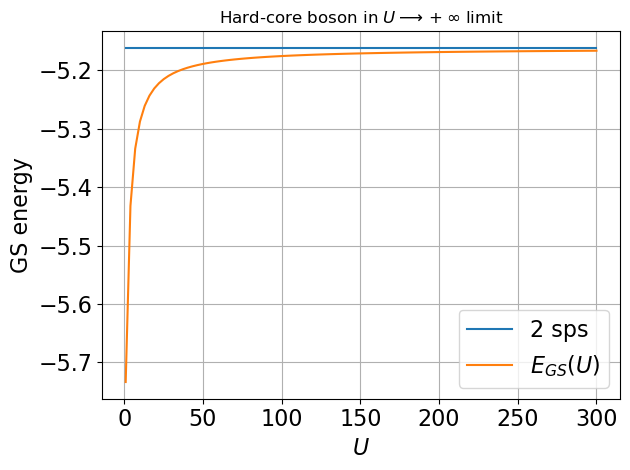

In [ ]:
%matplotlib inline
plt.plot(U,np.ones(len)*E_2sps,label='2 sps')
plt.plot(U,E_lim,label='$E_{GS}(U)$')
plt.title('Hard-core boson in $U\longrightarrow +\infty$ limit')
plt.xlabel('$U$',fontsize=16)
plt.ylabel('GS energy',fontsize=16)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)
plt.grid()
plt.tight_layout()
plt.show()

##### 2.

In [ ]:
# system size
L=8 
a=3
b=L-a
# hopping
J=1.0 
deltaJ = 0.5
# interaction
U_lim = 1E12
U_2sps= 1.0

In [ ]:
basis_2sps_a=boson_basis_1d(L,a,sps=2)
basis_lim_a=boson_basis_1d(L,a)
basis_2sps_b=boson_basis_1d(L,b,sps=2)
basis_lim_b=boson_basis_1d(L,b)

hop=[[-J-deltaJ*(-1)**i,i,(i+1)%L] for i in range(L)] 
interact_2sps_nn=[[0.5*U_2sps,i,i] for i in range(L)]
interact_2sps_n=[[-0.5*U_2sps,i] for i in range(L)]
interact_lim_nn=[[0.5*U_lim,i,i] for i in range(L)]
interact_lim_n=[[-0.5*U_lim,i] for i in range(L)]

static_2sps=[['+-',hop],['-+',hop],['nn',interact_2sps_nn],['n',interact_2sps_n]]
static_lim=[['+-',hop],['-+',hop],['nn',interact_lim_nn],['n',interact_lim_n]]
dynamic=[]

H_2sps_a= hamiltonian(static_2sps,dynamic,basis=basis_2sps_a,dtype=np.float64)
H_lim_a =hamiltonian(static_lim,dynamic,basis=basis_lim_a,dtype=np.float64)
H_2sps_b= hamiltonian(static_2sps,dynamic,basis=basis_2sps_b,dtype=np.float64)
H_lim_b =hamiltonian(static_lim,dynamic,basis=basis_lim_b,dtype=np.float64)

E_2sps_a, V = H_2sps_a.eigh()
E_2sps_b, V = H_2sps_b.eigh()
E_lim_a, V = H_lim_a.eigh()
E_lim_b, V = H_lim_b.eigh()

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


In [ ]:
print('Ground state energies for L=8, a=3, b=L-a:')
print('2 sps,   N=a,   GS:', E_2sps_a[0])
print('2 sps,   N=b,   GS:', E_2sps_b[0])
print('U limit, N=a,   GS:', E_lim_a[0])
print('U limit, N=b,   GS:', E_lim_b[0])

Ground state energies for L=8, a=3, b=L-a:
2 sps,   N=a,   GS: -5.162277660168384
2 sps,   N=b,   GS: -5.162277660168377
U limit, N=a,   GS: -5.162061427120772
U limit, N=b,   GS: -5.161623950074867


In [ ]:
abs(E_2sps_a - E_2sps_b) < 1E15

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])

# d)

The SSH bosonic model involves some degree of dimerization along the chain of sites the bosons are allowed to occupy. This characteristic is responsible for topological properties the model can acquire. We can start considering an instance of a chain made of $L=2l$ sites whith open boundary conditions. We can expect, for a long chain ( in the thermodinamic limit and for $L\rightarrow \infty$), two different behaviors to appear in bulk and edge regions, due to the presence of the boundaries. For both behaviors dimerization is crucial in determining the emerging properties. \
To better see dimerization from the Hamiltonian form, we can recast $H$ as follows, highlighting the cell structure:
$$
\begin{align}
H &= -\sum_i (J + (-1)^i\delta J)(b^\dagger_i b_{i+1} + h.c.) + H_U\\
&= - \sum_{i = 0}^{L/2-1} (J-\delta J)(b^\dagger_{2i+1} b_{2i+2} + h.c.) - \sum_{i=1}^{L/2} (J+\delta J)(b^\dagger_{2i} b_{2i+1} + h.c.) + H_U \\
&= - \sum_{i = 0}^{L/2-1} {\it v}(b^\dagger_{2i+1} b_{2i+2} + h.c.) - \sum_{i=1}^{L/2} \it w(b^\dagger_{2i} b_{2i+1} + h.c.) + H_U \\
\end{align}
$$
Where we defined
$$ 
{\it v} = J-\delta J \\
\it w = J +\delta J
$$
that are respectively the intracell and intercell interactions. Then, in order to characterize the bulk properties, one can study the case of periodic boundary conditions. The momentum space tightbinding Hamiltonian will be:
$$
  H = 
  \begin{pmatrix}
    U & {\it v} + \it w e^{-ik}\\
    {\it v} +\it w e^{ik} & U\\
  \end{pmatrix}
$$
And the dispersion relation
$$
E(k) = U \pm \sqrt{{\it v}^2+{\it w} ^2+2{\it v}{\it w} \cos k}
$$
will be gapped for a staggered potential, i.e. for $\delta J \neq 0$ or equivalently for ${\it v} \neq \it w$, and the gap will be
$$
\Delta = \min_k E(k) = |{\it v}-\it w|
$$
This gap makes occupied states energetically favourable by lowering their energy, while moving to higher energies the unoccupied states. 
The bulk momentum space Hamiltonian components for this two band system are
$$
\begin{align}
d_x(k) &= {\it v} + {\it w} \cos k \\
d_y(k) &= {\it w} \sin k \\
d_z(k) &= 0
\end{align}
$$ 
For k spanning the Brillouin zone, the vector d(k) closes a loop, in this case a circle of radius $\it w$ centered at $({\it v},0)$, winding around the origin a number of times equal to the winding number $\nu$. A winding number $\nu =0 $ identifies an insulator.\
The edge states, on the countrary with bulk states, are not translation invariant in the thermodynamic limit. In the fully dimerized limit, they fall into two cases: trivial and topological. The first occurs when the chain ends with a full dimer (${\it v} =1, {\it w}=0$), the second when it ends with a single site (${\it v} =1, {\it w}=0$), and in both cases the sysyem will be insulating (flat bands).
In the trivial case the energy eigenstates will be the ones of the bulk, while in the topological case there will be a zero-energy eigenstate at the edges. For intermediate (not fully dimerized) cases, we can distinguish the trivial from the topological case via the winding number: if $\nu=0$ the intracell interaction dominates the intercell one ($\it v >w$) and we are in the trivial case; if instead $\nu=1$ we are in the opposite situation ($\it v <w$) of the topological case. \
For our Hamiltonian we have topological properties if
$$
{\it w>v} \iff J +\delta J> J-\delta J \iff \delta J > - \delta J \iff \delta J>0
$$.
We show for this case $\delta J>0$ the peculiar propertiy of the single particle spectrum of core bosons.

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


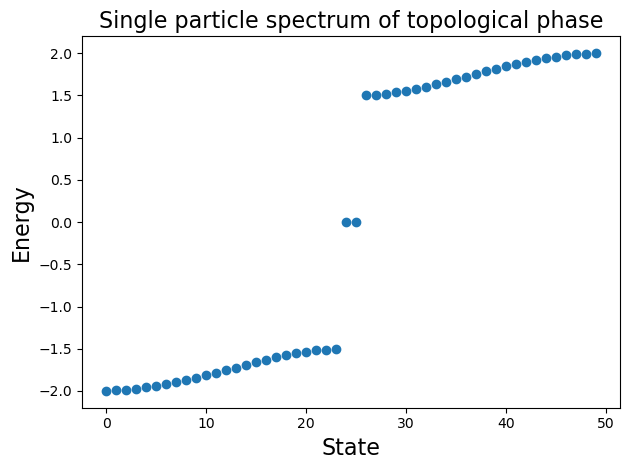

In [221]:
# system size
L=50
# hopping
J=1.0 
deltaJ = -0.75
# interaction
U = 1E12
Nbosons=1
basis_sp=boson_basis_1d(L,Nbosons)

hop=[[-J-deltaJ*(-1)**i,i,(i+1)] for i in range(L-1)] 
interact_sp_nn=[[0.5*U,i,i] for i in range(L)]
interact_sp_n=[[-0.5*U,i] for i in range(L)]

static_sp=[['+-',hop],['-+',hop],['nn',interact_sp_nn],['n',interact_sp_n]]
dynamic=[]

H_sp= hamiltonian(static_sp,dynamic,basis=basis_sp,dtype=np.float64)

E_sp, V = H_sp.eigh()
%matplotlib inline
plt.scatter(range(np.size(E_sp)),E_sp)
#plt.plot(E_sp)
plt.title('Single particle spectrum of topological phase',fontsize=16)
plt.xlabel('State',fontsize=16)
plt.ylabel('Energy',fontsize=16)
plt.tight_layout()
plt.show()

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


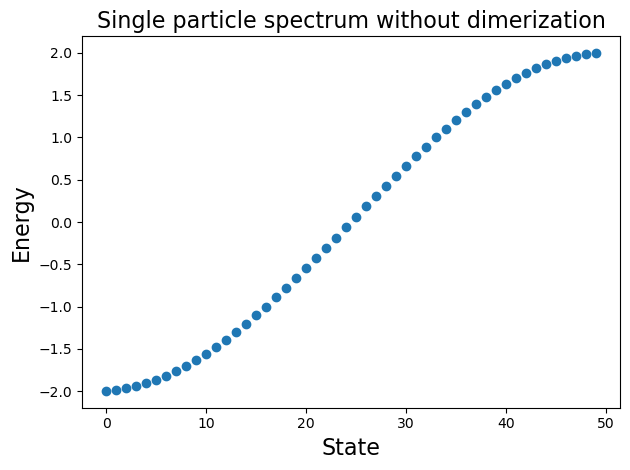

In [224]:
# system size
L=50
# hopping
J=1.0 
deltaJ = 0.0
# interaction
U = 1E12
Nbosons=1
basis_sp=boson_basis_1d(L,Nbosons)

hop=[[-J-deltaJ*(-1)**i,i,(i+1)] for i in range(L-1)] 
interact_sp_nn=[[0.5*U,i,i] for i in range(L)]
interact_sp_n=[[-0.5*U,i] for i in range(L)]

static_sp=[['+-',hop],['-+',hop],['nn',interact_sp_nn],['n',interact_sp_n]]
dynamic=[]

H_sp= hamiltonian(static_sp,dynamic,basis=basis_sp,dtype=np.float64)

E_sp, V = H_sp.eigh()
%matplotlib inline
plt.scatter(range(np.size(E_sp)),E_sp)
#plt.plot(E_sp)
plt.title('Single particle spectrum without dimerization',fontsize=16)
plt.xlabel('State',fontsize=16)
plt.ylabel('Energy',fontsize=16)
plt.tight_layout()
plt.show()

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


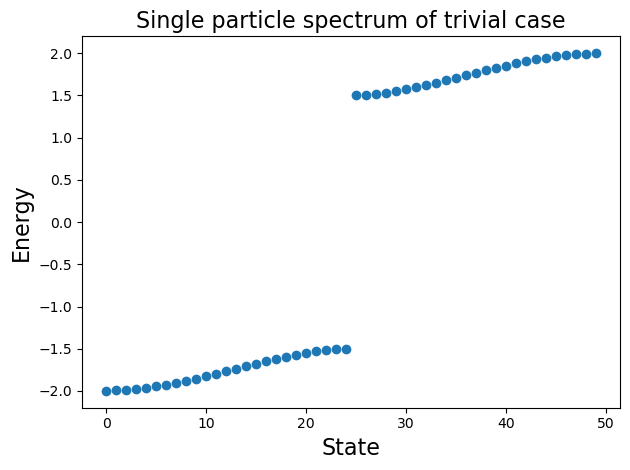

In [222]:
# system size
L=50
# hopping
J=1.0 
deltaJ = +0.75
# interaction
U = 1E12
Nbosons=1
basis_sp=boson_basis_1d(L,Nbosons)

hop=[[-J-deltaJ*(-1)**i,i,(i+1)] for i in range(L-1)] 
interact_sp_nn=[[0.5*U,i,i] for i in range(L)]
interact_sp_n=[[-0.5*U,i] for i in range(L)]

static_sp=[['+-',hop],['-+',hop],['nn',interact_sp_nn],['n',interact_sp_n]]
dynamic=[]

H_sp= hamiltonian(static_sp,dynamic,basis=basis_sp,dtype=np.float64)

E_sp, V = H_sp.eigh()
%matplotlib inline
plt.scatter(range(np.size(E_sp)),E_sp)
#plt.plot(E_sp)
plt.title('Single particle spectrum of trivial case',fontsize=16)
plt.xlabel('State',fontsize=16)
plt.ylabel('Energy',fontsize=16)
plt.tight_layout()
plt.show()

Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!
Hermiticity check passed!
Symmetry checks passed!
Particle conservation check passed!


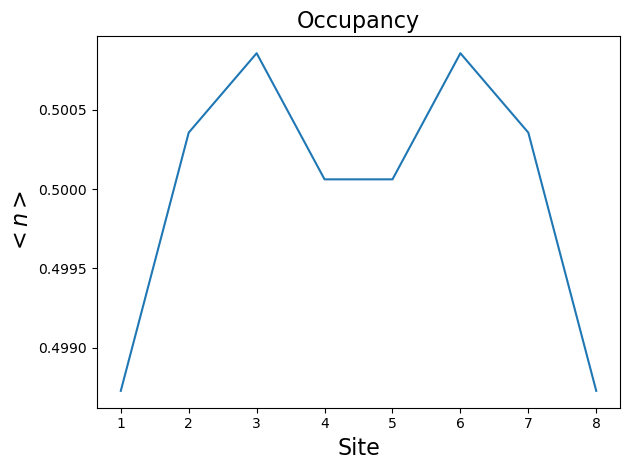

In [217]:
# system size
L=8
# hopping
J=1.0 
deltaJ = -0.75
# interaction
U = 100
Nbosons=4
basis_mp=boson_basis_1d(L,Nbosons)

hop=[[-J-deltaJ*(-1)**i,i,(i+1)] for i in range(L-1)] 
interact_sp_nn=[[0.5*U,i,i] for i in range(L)]
interact_sp_n=[[-0.5*U,i] for i in range(L)]

static_sp=[['+-',hop],['-+',hop],['nn',interact_sp_nn],['n',interact_sp_n]]
dynamic=[]

H_mp= hamiltonian(static_sp,dynamic,basis=basis_mp,dtype=np.float64)
E_mp, V = H_mp.eigsh(k=1,which='SA', maxiter=1E9)


#index=[]
#for i in range(np.shape(V)[1]):
#    pos_flag=False
#    for j in range(np.shape(V)[0]):
#        if E_mp


#for i in range(len(E_mp)):
#    if E_mp[i] == 0:
#        index.append(i)
        

exp_n=np.zeros(L)
for i in range(L):
    static_n=[['n',[[1.0,i]]]]
    n_operator=hamiltonian(static_n,dynamic,basis=basis_mp,dtype=np.float64)
    exp_n[i]=n_operator.expt_value(V)
        


#exp_n
#print(exp_n)

%matplotlib inline
plt.plot(np.array(range(L))+1,exp_n)
plt.title('Occupancy',fontsize=16)
plt.xlabel('Site',fontsize=16)
plt.ylabel('$<n>$',fontsize=16)
plt.tight_layout()
plt.show()

In [ ]:
np.array(range(L))+1

array([1, 2, 3, 4, 5, 6, 7, 8])